# Prediccion calidad de vino - Arboles de decision
En el siguiente ejercicio disponemos de un conjunto de datos acerca de la calidad del vino, de forma que se busca por medio de un modelo de clasificiacion de arboles de decision poder definir la calidad de un vino en base a sus caracteristicas principales

In [52]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree



#Configuracion Graficas
# ==============================================================================
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [6, 4.5]
palette = ["#003049","#d62828","#f77f00","#fcbf49","#eae2b7"]
sns.set_theme( palette= palette, context= "notebook")

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 1. Analisis Exploratorio de datos (EDA)
A continuacion vamos realizar el analisis exploratorio de datos del conjunto de datos acerca de la calidad del diferentes vinos en base a sus caracteristicas, esto se desarrolla con el fin de detectar patrones, tendencias y relaciones entre las difrentes variables del conjunto de datos, ademas nos permite detectar anomalias y datos faltantes, y darles el tratamiento mas adecuado para nuestro caso de estudio.

### 1.1 Ingreso de datos
Ingresamos los datos sobre los cuales vamos a realizar el analisis y posteriormente la creacion del modelo

In [53]:
# Datos
# ==============================================================================
df = pd.read_csv("winequality-red.csv", header=0, names= ["acidez_fija",
                                                          "acidez_volatil",
                                                          "acido_citrico",
                                                          "azucar_residual",
                                                          "cloruros",
                                                          "dioxido_de_azufre_libre",
                                                          "dioxido_de_azufre_total",
                                                          "densidad",
                                                          "pH",
                                                          "sulfatos",
                                                          "alcohol",
                                                          "calidad"])
df

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 1.2 Resumen de datos
Empezamos a comprender nuestros datos por medio de los resumenes de datos

In [54]:
df.head(5)

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


La variable dependiente que vamos a predecir sera *__calidad__*, esta variable tiene una escala de calidad del vino. Las demas variables seran las variables independientes

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   acidez_fija              1599 non-null   float64
 1   acidez_volatil           1599 non-null   float64
 2   acido_citrico            1599 non-null   float64
 3   azucar_residual          1599 non-null   float64
 4   cloruros                 1599 non-null   float64
 5   dioxido_de_azufre_libre  1599 non-null   float64
 6   dioxido_de_azufre_total  1599 non-null   float64
 7   densidad                 1599 non-null   float64
 8   pH                       1599 non-null   float64
 9   sulfatos                 1599 non-null   float64
 10  alcohol                  1599 non-null   float64
 11  calidad                  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Todas las variable son Numericas, ademas podemos observar que el conjunto de datos no tiene ningun valor Nulo, con lo cual no tenemos que relizar ningun tratamiento de valores faltantes en este caso, tampoco es necesario realizar alguna transformacion de caracteristicas.

### 1.3 Valores Atipicos

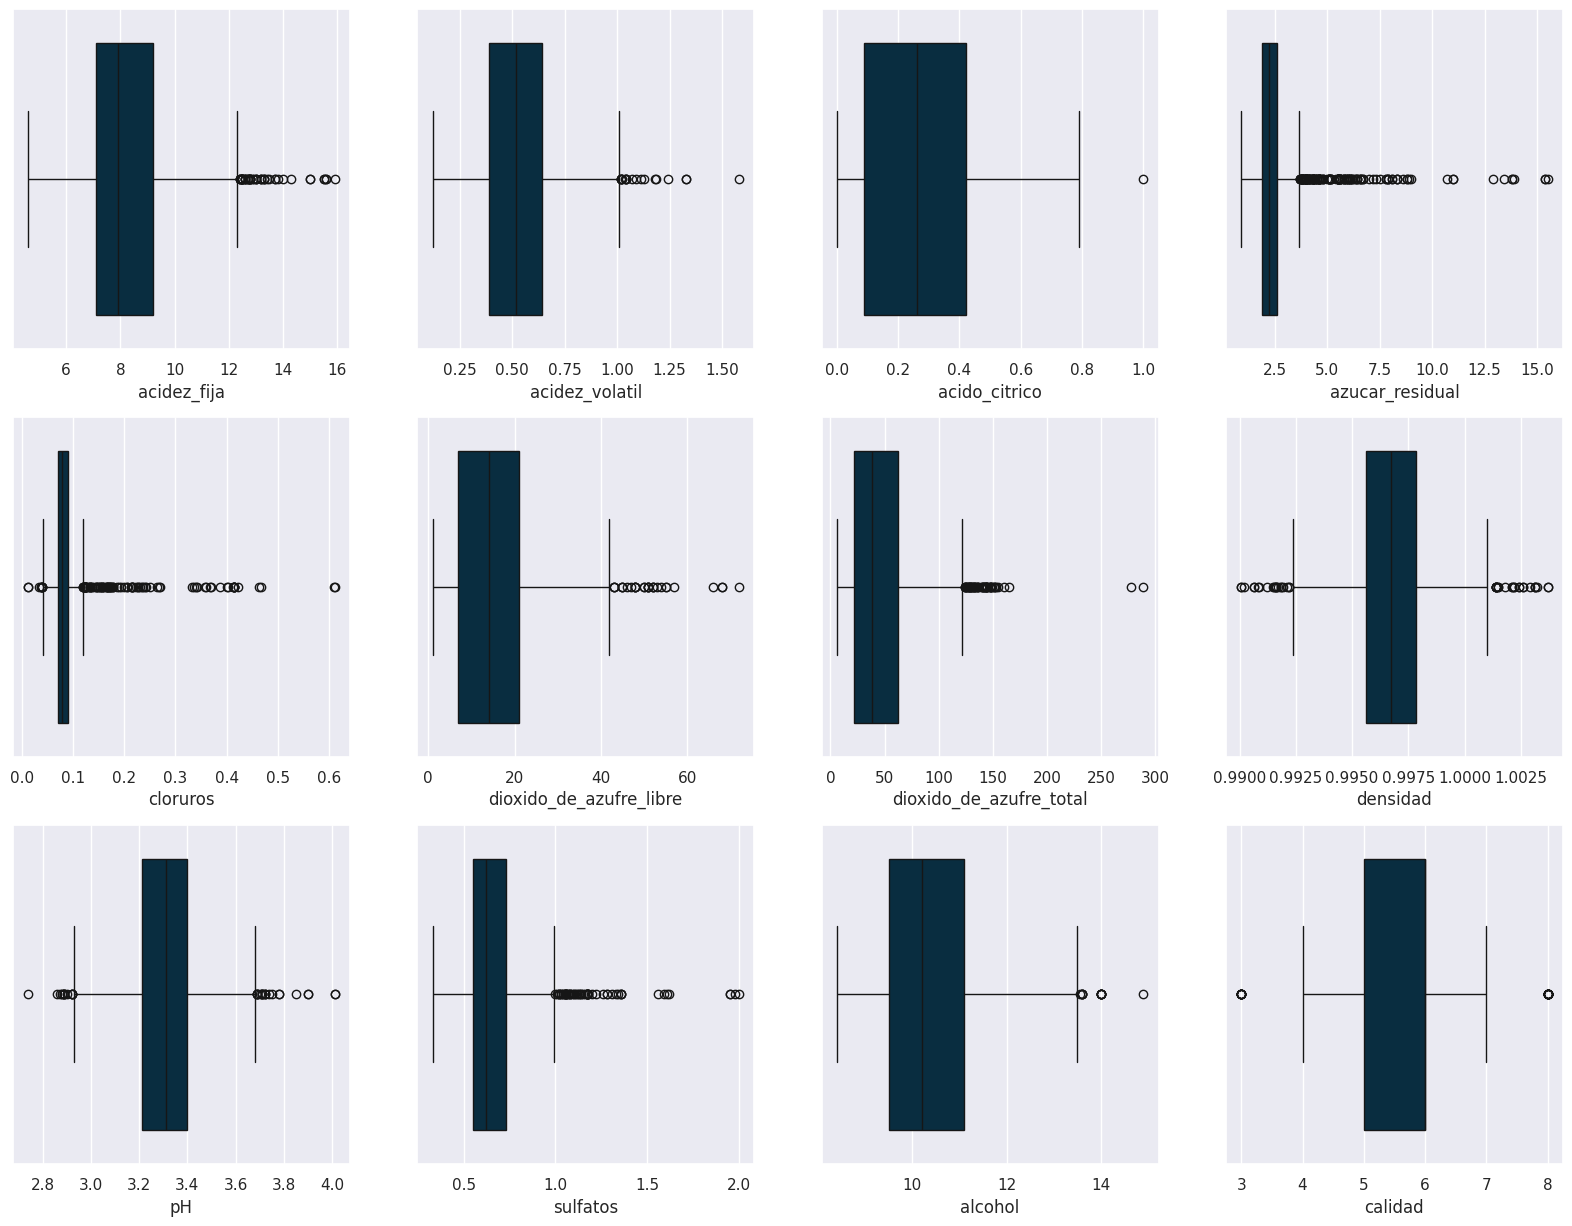

In [56]:
# Creamos la matriz de graficos
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Creamos un bucle para recorrer las columnas
for i, var in enumerate(df.columns):
    sns.boxplot(data = df, x = var , ax = axes[i//4, i%4])

En esta situación, aunque observamos la presencia de valores atípicos en ciertas variables, es fundamental analizarlos detenidamente para determinar si su exclusión es apropiada o no. No obstante, dado que el conjunto de datos ya ha sido preprocesado, es probable que estos valores atípicos no sean errores de medición, sino mediciones legítimas. Por lo tanto, lo más recomendable sería incorporarlos en el modelo

### 1.4 Analisis Univariable
A continuacion realizaremos el analisis univariable de cada variable que hace parte de nuestro conjunto de datos. Esto lo realizamos por medio de un resumen de datos y representaciones graficas como histogramas.

In [57]:
df.describe()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


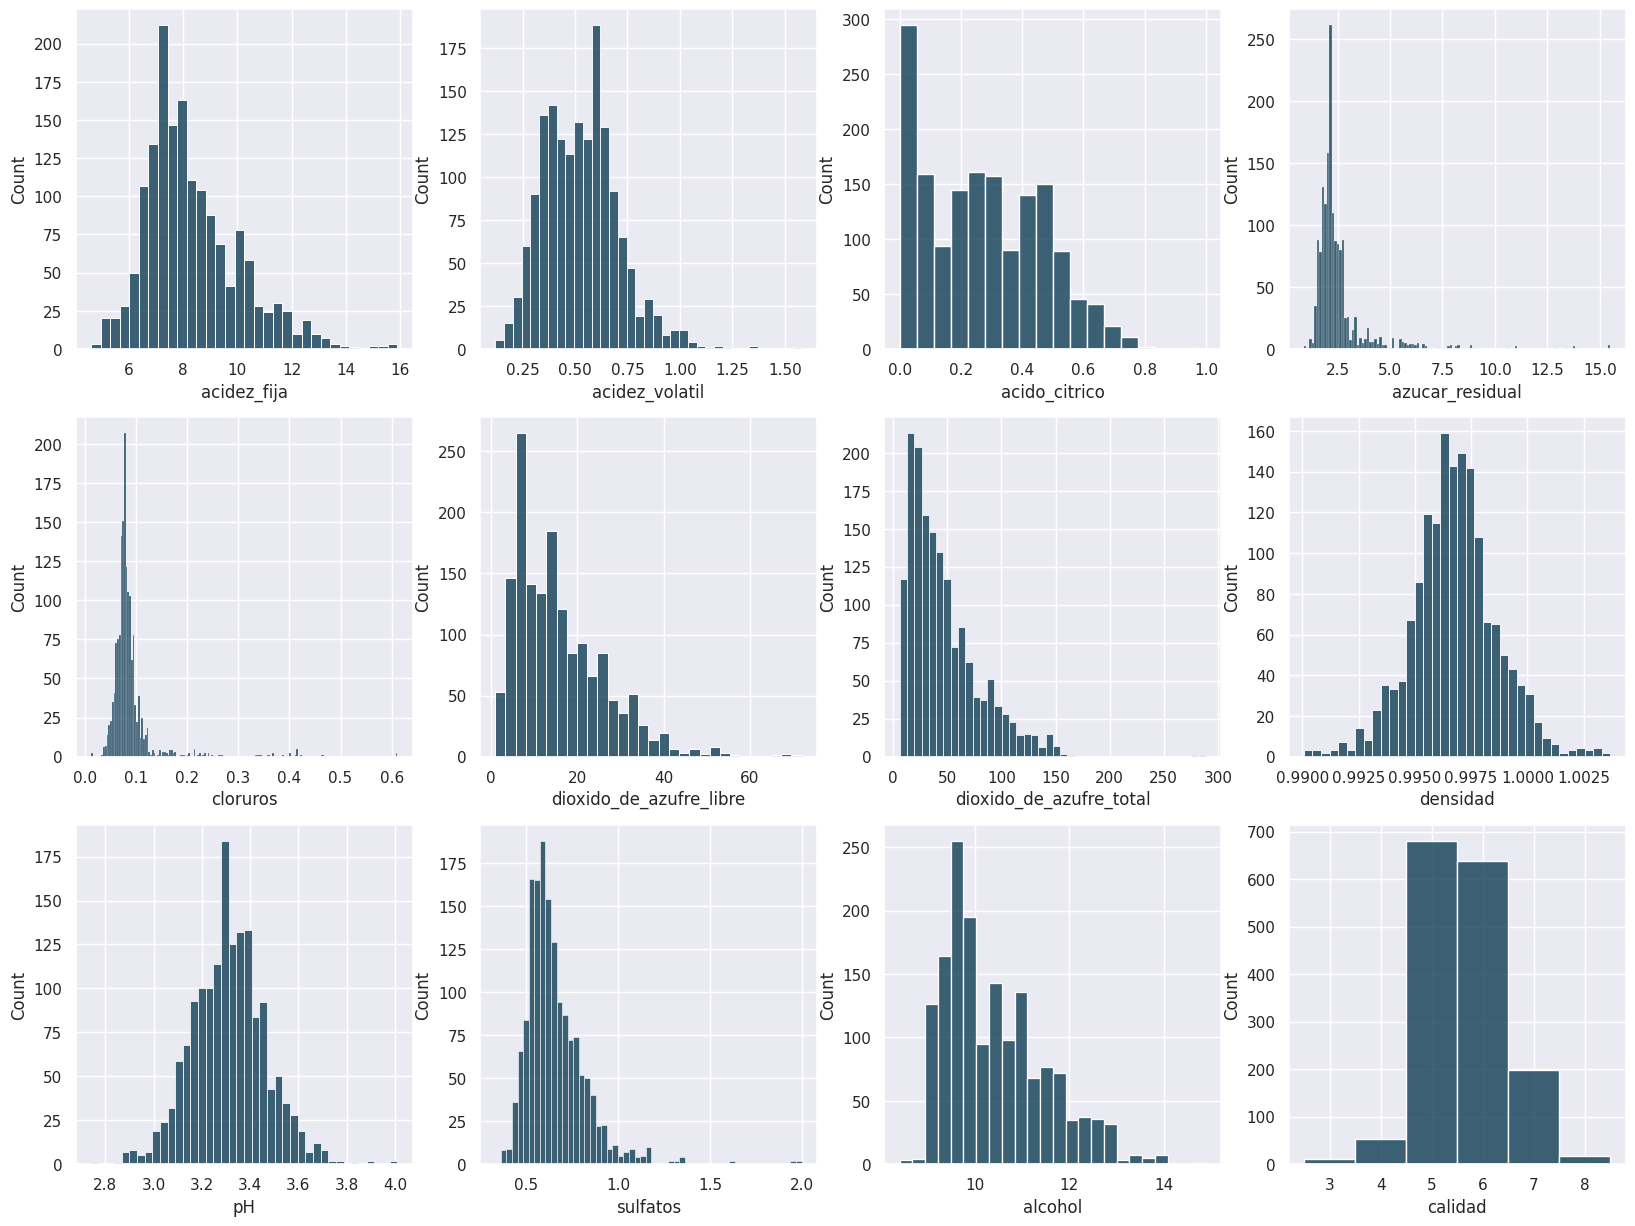

In [58]:
# Creamos la matriz de graficas
# ====================================
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Creamos un bucle para recorrer las columnas
for i, var in enumerate(df.columns[:-1]):
    sns.histplot(data = df, x = var , ax = axes[i//4, i%4])
sns.histplot(ax= axes[2,3], data= df, x= "calidad", discrete= True);

Del análisis univariable se pueden observar los siguientes puntos:

- La mayoría de los conjuntos de datos siguen una distribución normal, destacándose visualmente el *pH*, la *densidad* y la *acidez_volátil* por su ajuste cercano a la distribución normal.

- Las distribuciones de *dióxido_de_azufre_libre*, *dióxido_de_azufre_total*, *azúcar_residual*, *sulfatos*, *acidez_fija* y *alcohol* muestran distribuciones asimétricas positivas, lo que indica una cola hacia la derecha en la distribución.

- La mayoría de los valores de la variable objetivo, *calidad*, se encuentran en el rango de 5 o 6, con una proporción muy reducida en los valores 3 y 8. Además, no se registran vinos con una puntuación de calidad superior a 8 o inferior a 3.

### 1.5 Analisis Bivariado
A continuacion vamos arealizar un analisis bivariado para identificar la relacion que pueda existir entre cada variable independiente y la variable objetivo que es *calidad*

In [59]:
df.head(3)

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_de_azufre_libre,dioxido_de_azufre_total,densidad,pH,sulfatos,alcohol,calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


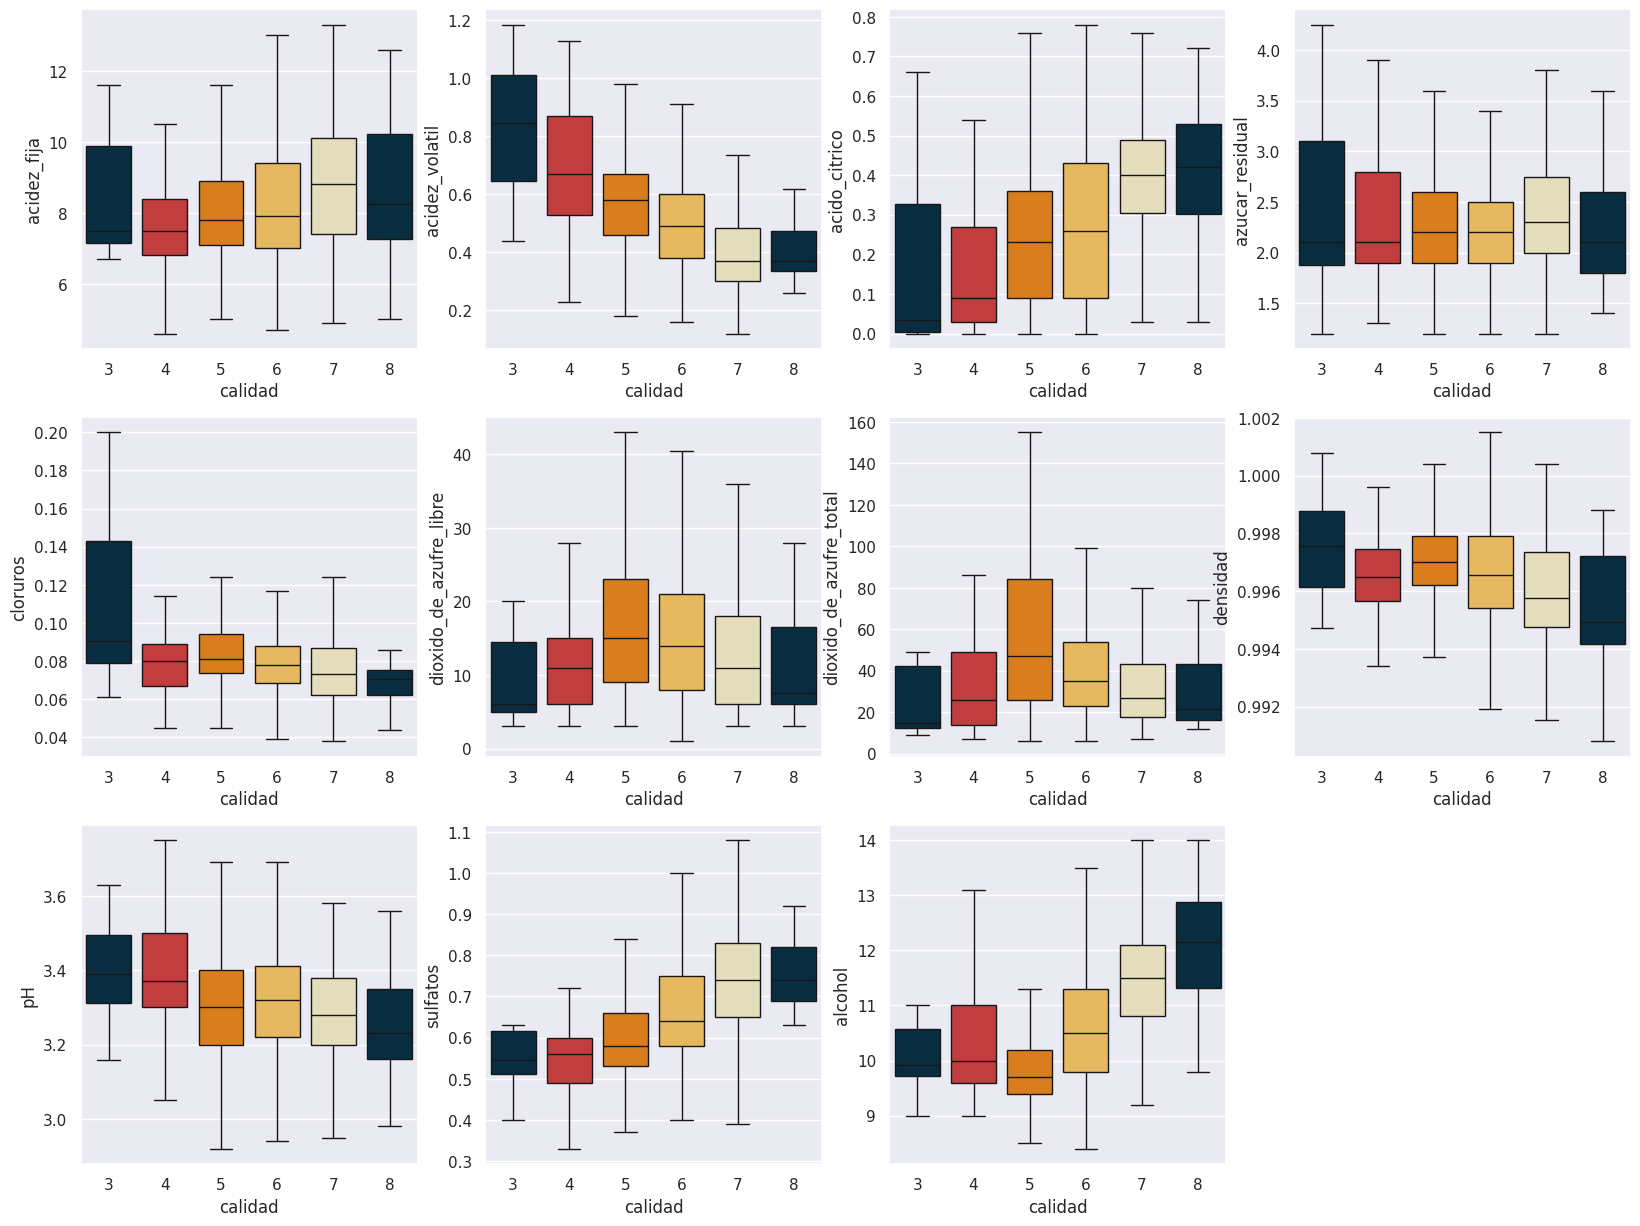

In [60]:
# Creamos una matriz de graficas
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Creamos un bucle para recorrer las columnas
for i, var in enumerate(df.columns[:-1]):
    sns.boxplot(data = df, x = "calidad", y = var, ax = axes[i//4, i%4], palette= palette, showfliers= False)
fig.delaxes(axes[2,3])

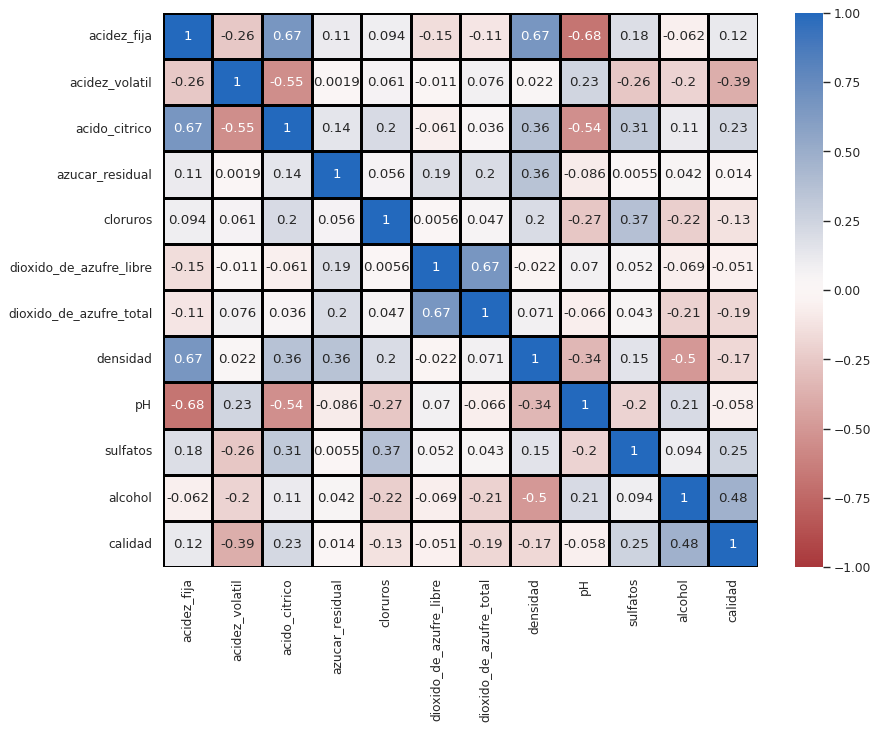

In [61]:
fig, axes = plt.subplots(nrows= 1, ncols= 1, figsize= (12, 9), dpi= 80)
sns.heatmap(data= df.corr(), annot= True, vmin=-1, vmax=1, cmap= sns.color_palette("vlag_r", as_cmap=True), linecolor= "black", linewidth= 1);

Del análisis bivariado se pueden destacar los siguientes hallazgos:

- A medida que la acidez volátil del vino disminuye, tiende a mejorar su puntaje de calidad, estas dos variables poseen una correlacion con un valor de -0.39, lo cual indica una relacion debil inversa.

- Se observa una tendencia debil positiva entre la cantidad de ácido cítrico presente en el vino y su puntaje de calidad.

- Los vinos con los puntajes de calidad más bajos tienden a tener niveles más altos de cloruros en promedio.

- Existe una relación favorable entre los niveles elevados de sulfatos y alcohol en los vinos y sus puntajes de calidad.

## 2.  Contruccion del modelo de clasificacion de Arbol de decision
### 2.1 Conjunto de variables independientes y la variable dependiente
A continuacion definimos cuales van a ser las variables que haran parte del conjuto de caracteristicas y cual sera la variable dependiente

In [62]:
X = df.drop("calidad", axis= 1)
y = df["calidad"]

### 2.2  Dividimos el conjuto de datos en datos de entrenamiento y de test
A continuacion debemos dividir el conjuto de datos en datos de entrenamiento que seran utilizados para entrenar el modelo de clasificacion y el conjuto de test que nos permitira evaluar el modelo una vez entrenado, utilizaremos un division de proporcion de 80% de datos de entrenamiento y el 20% restantes de datos de test.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 12, shuffle= True)
print(f"Dimensiones del X_train: {X_train.shape}")
print(f"Dimensiones del X_test: {X_test.shape}")
print(f"Dimensiones del y_train : {y_train.shape}")
print(f"Dimensiones del y_test: {y_test.shape}")

Dimensiones del X_train: (1279, 11)
Dimensiones del X_test: (320, 11)
Dimensiones del y_train : (1279,)
Dimensiones del y_test: (320,)


### 2.3  Entrenamos el modelo

In [64]:
tree = DecisionTreeClassifier()
arbol_modelo = tree.fit(X_train, y_train)

### 2.4 Esquema del modelo
Ahora imprimimos el modelo creado de arbol de decision

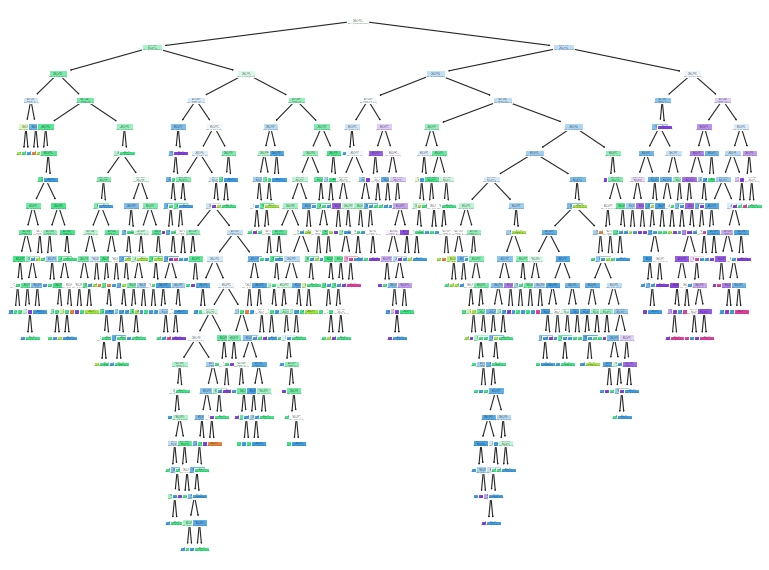

In [65]:
fig, axes = plt.subplots(nrows= 1, ncols= 1, figsize= (12, 9), dpi= 80)
plot_tree(arbol_modelo, filled= True, ax= axes);

### 2.5 Predicciones del modelo
Realizamos la prediccion del modelo con el conjuto de caracteristicas de prueba

In [66]:
predicciones = arbol_modelo.predict(X_test)
predicciones

array([6, 5, 7, 5, 6, 5, 5, 6, 6, 7, 5, 5, 6, 5, 7, 6, 6, 6, 5, 5, 5, 5,
       6, 6, 6, 5, 5, 5, 7, 5, 5, 7, 7, 6, 6, 6, 7, 6, 5, 5, 5, 5, 6, 7,
       5, 5, 6, 6, 6, 7, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 6, 7, 7, 6, 6, 6,
       5, 7, 5, 5, 6, 8, 5, 6, 6, 6, 6, 5, 6, 4, 6, 6, 6, 5, 5, 5, 5, 7,
       6, 6, 6, 5, 6, 5, 5, 6, 4, 5, 7, 6, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5,
       5, 6, 6, 6, 6, 5, 5, 6, 7, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 4, 8, 6,
       5, 6, 5, 5, 5, 5, 5, 7, 5, 5, 7, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6,
       6, 6, 6, 5, 5, 6, 5, 5, 8, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 5, 6, 5,
       7, 5, 7, 7, 6, 7, 5, 6, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5,
       5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 4, 5, 6, 6, 6, 5, 5, 5, 5, 6,
       7, 6, 7, 6, 5, 6, 6, 6, 6, 5, 5, 5, 4, 5, 6, 7, 6, 5, 4, 6, 6, 5,
       5, 6, 7, 5, 5, 7, 5, 5, 6, 6, 4, 5, 6, 5, 6, 4, 5, 5, 5, 6, 5, 4,
       5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 7, 5, 4, 5, 4, 5, 5, 6, 5, 6, 5,
       6, 5, 6, 6, 7, 7, 5, 5, 5, 8, 6, 5, 5, 7, 6,

In [67]:
pd.crosstab(np.array([i for i in y_test]), predicciones, rownames=["Actual"], colnames= ["predicciones"])

predicciones,4,5,6,7,8
Actual,,,,,
3,0,2,0,0,0
4,0,3,2,0,0
5,8,104,23,4,0
6,3,34,83,12,1
7,1,2,15,19,3
8,0,0,1,0,0


In [68]:
accuracy_score(y_test, predicciones)

0.64375

Observamos que tenemos un porcentaje de acierto del modelo creado es del 64%, es decir el modelo es capaz de predecir el puntaje de calidad en base al conjunto de caracteristicas en una proporcion del 64%.